In [14]:
# Upload an image
from google.colab import files
uploaded = files.upload()

Saving sample.jpg to sample.jpg


In [15]:
# Task 1:
# Check that exactly one file was uploaded.
# Otherwise raise an error.
if len(uploaded) != 1:
    raise ValueError("Number of files not equal to one.")

In [16]:
# Task 2:
# Extract the name of the uploaded file in variable named filename
# User can upload a file with any name, and we need to extract that name
filename = None
filename = list(uploaded.keys())[0]
filename

'sample.jpg'

In [17]:
from PIL import Image

# Read the image using OpenCV
try:
  image = Image.open(filename)
  image.load()
except Exception as e:
  raise ValueError('Uploaded file is not an image')


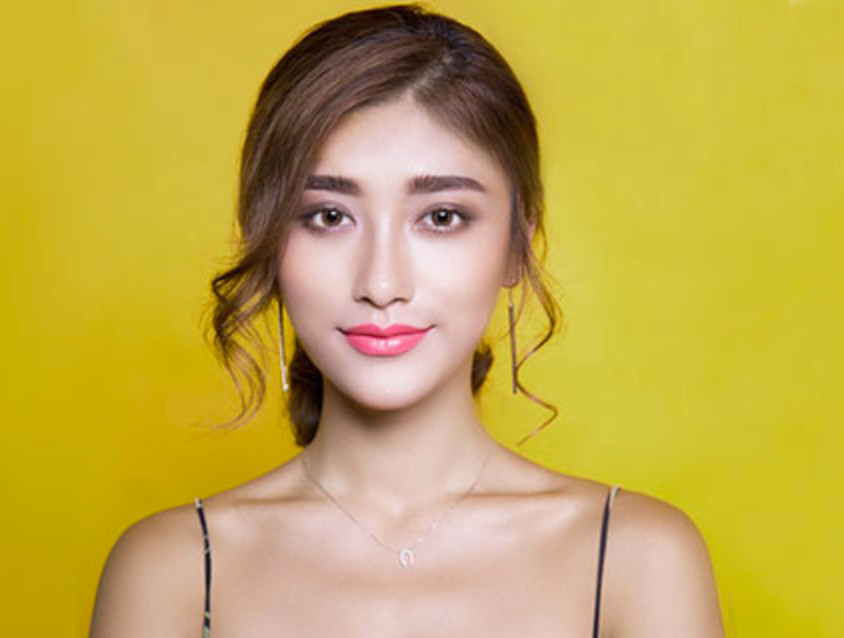

In [18]:
image

<ipython-input-19-45101af22706>:26: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_image = image.resize((new_width, new_height), Image.ANTIALIAS)


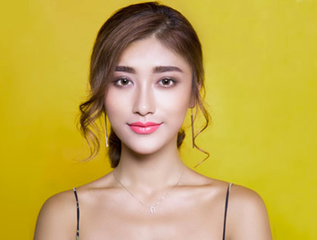

In [19]:
MAX_WIDTH = 360
MAX_HEIGHT = 240

# Task 3:
# Resize the image keeping the aspect ratio, so that it fits within a box
# of MAX_WIDTH x MAX_HEIGHT. If the image is smaller, it should be upscaled.
resized_image = None


width, height = image.size
if width > MAX_WIDTH or height > MAX_HEIGHT:
    if width / MAX_WIDTH > height / MAX_HEIGHT:
        new_width = MAX_WIDTH
        new_height = int(height * (MAX_WIDTH / width))
    else:
        new_height = MAX_HEIGHT
        new_width = int(width * (MAX_HEIGHT / height))
else:
    new_width = width
    new_height = height

resized_image = image.resize((new_width, new_height), Image.ANTIALIAS)

# Save and display the resized image
resized_image.save('resized_image.jpg')
display(resized_image)

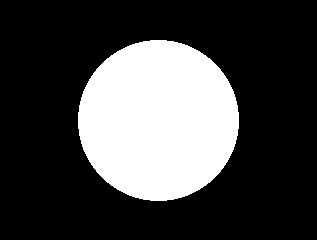

In [20]:
from PIL import Image, ImageDraw

# Create a new image mask with the same size as the resized image.
width, height = resized_image.size  # Use the resized image's size
radius = min(width, height) // 3
center_x, center_y = width // 2, height // 2

mask_image = Image.new('L', resized_image.size)
draw = ImageDraw.Draw(mask_image)
draw.ellipse((center_x - radius, center_y - radius, center_x + radius, center_y + radius), fill=255)

# Save and display the mask image
mask_image.save('mask_image.jpg')
display(mask_image)


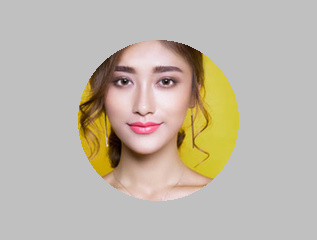

In [21]:
MASK_COLOR = 255
BG_COLOR = (192, 192, 192) # gray

# Task 4:
# Apply the mask on the uploaded image. On applying the mask to the image,
# only the pixels where mask is white (MASK_COLOR) are kept. All other pixels
# are changed to BG_COLOR
result_image = None

result_image = Image.new("RGB", resized_image.size, BG_COLOR)
result_image.paste(resized_image, (0, 0), mask_image)

result_image.save('result_image.jpg')
display(result_image)